In [1]:
import csv
import json
import pandas as pd
from datetime import datetime
import numpy as np
from collections import Counter


import warnings
warnings.filterwarnings("ignore")


localFolder = "../data_2019_processed/"
baseFolder = "../../Dataset_ECUADOR_2019/"

In [3]:
dsMetrics = pd.read_csv("result3epochsLSTM_oversample01.csv")
print(dsMetrics.columns)
dsMetrics

Index(['NN_type', 'units', 'epochs', 'batch_size', 'max_iterations', 'Users',
       'round_iteration', 'start_time', 'end_time', 'round_time_s',
       'round_time_m', 'class', 'accuracy', 'precision', 'recall', 'f1_score',
       'cohen_kappa_score', 'roc_auc_score', 'confusion_matrix', 'TP', 'FP',
       'FN', 'TN'],
      dtype='object')


,NN_type,units,epochs,batch_size,max_iterations,Users,round_iteration,start_time,end_time,round_time_s,...,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
0,LSTM,128,3,32,120,20,0,2023-03-08 00:56:09.146957,2023-03-08 00:58:26.221023,137.074066,...,0.925126,0.030090,0.058285,0.007457,0.509757,[[24980 267]\n [106338 3299]],24980.0,267.0,106338.0,3299.0
1,LSTM,128,3,32,120,20,0,2023-03-08 00:56:09.146957,2023-03-08 00:58:26.221023,137.074066,...,0.188481,0.989367,0.316641,0.007348,0.509702,[[3300 106567]\n [266 24751]],3300.0,106567.0,266.0,24751.0
2,LSTM,128,3,32,120,20,0,2023-03-08 00:56:09.146957,2023-03-08 00:58:26.221023,137.074066,...,0.556804,0.509729,0.187463,0.007402,0.509730,NaN,NaN,NaN,NaN,NaN
3,LSTM,128,3,32,120,20,1,2023-03-08 00:58:26.926597,2023-03-08 01:00:33.079804,126.153207,...,0.938096,0.078924,0.145599,0.022250,0.528154,[[24676 571]\n [100984 8653]],24676.0,571.0,100984.0,8653.0
4,LSTM,128,3,32,120,20,1,2023-03-08 00:58:26.926597,2023-03-08 01:00:33.079804,126.153207,...,0.194581,0.977375,0.324549,0.022001,0.528090,[[8658 101209]\n [566 24451]],8658.0,101209.0,566.0,24451.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,LSTM,128,3,32,120,20,118,2023-03-08 04:59:05.075273,2023-03-08 05:01:09.036016,123.960743,...,0.488262,0.694168,0.573287,0.454493,0.764252,[[91666 18201]\n [7651 17366]],91666.0,18201.0,7651.0,17366.0
356,LSTM,128,3,32,120,20,118,2023-03-08 04:59:05.075273,2023-03-08 05:01:09.036016,123.960743,...,0.705069,0.764635,0.724816,0.455264,0.764070,NaN,NaN,NaN,NaN,NaN
357,LSTM,128,3,32,120,20,119,2023-03-08 05:01:09.758923,2023-03-08 05:03:14.434101,124.675178,...,0.921604,0.838066,0.877852,0.458956,0.764242,[[17431 7816]\n [17754 91883]],17431.0,7816.0,17754.0,91883.0
358,LSTM,128,3,32,120,20,119,2023-03-08 05:01:09.758923,2023-03-08 05:03:14.434101,124.675178,...,0.491943,0.691890,0.575031,0.457396,0.764592,[[91991 17876]\n [7708 17309]],91991.0,17876.0,7708.0,17309.0


In [5]:
dsMetrics['class']

0       awake
1      asleep
2         avg
3       awake
4      asleep
        ...  
355    asleep
356       avg
357     awake
358    asleep
359       avg
Name: class, Length: 360, dtype: object

<AxesSubplot: xlabel='round_iteration'>

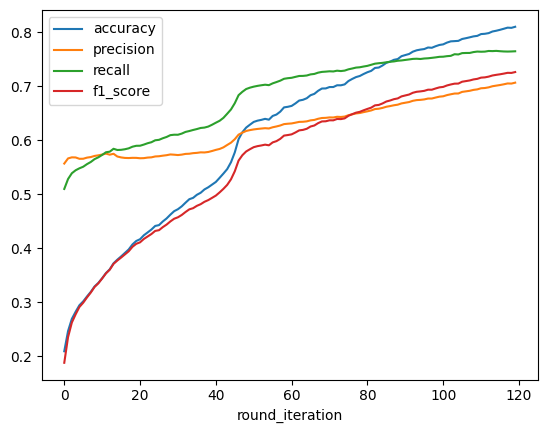

In [8]:
metrics = ["round_iteration","accuracy","precision","recall","f1_score"]
dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "avg"]
lines = dfMetricsClass[metrics].plot.line(x='round_iteration')

lines

<AxesSubplot: xlabel='round_iteration'>

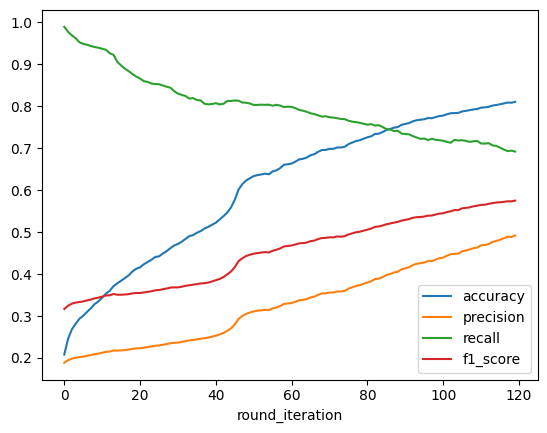

In [9]:
metrics = ["round_iteration","accuracy","precision","recall","f1_score"]
dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
lines = dfMetricsClass[metrics].plot.line(x='round_iteration')

lines

<AxesSubplot: xlabel='round_iteration'>

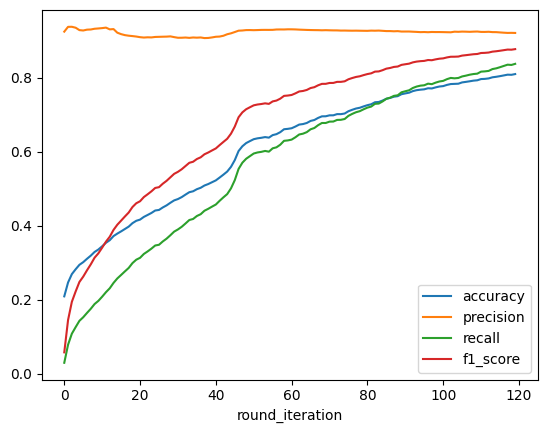

In [10]:
metrics = ["round_iteration","accuracy","precision","recall","f1_score"]
dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "awake"]
lines = dfMetricsClass[metrics].plot.line(x='round_iteration')

lines

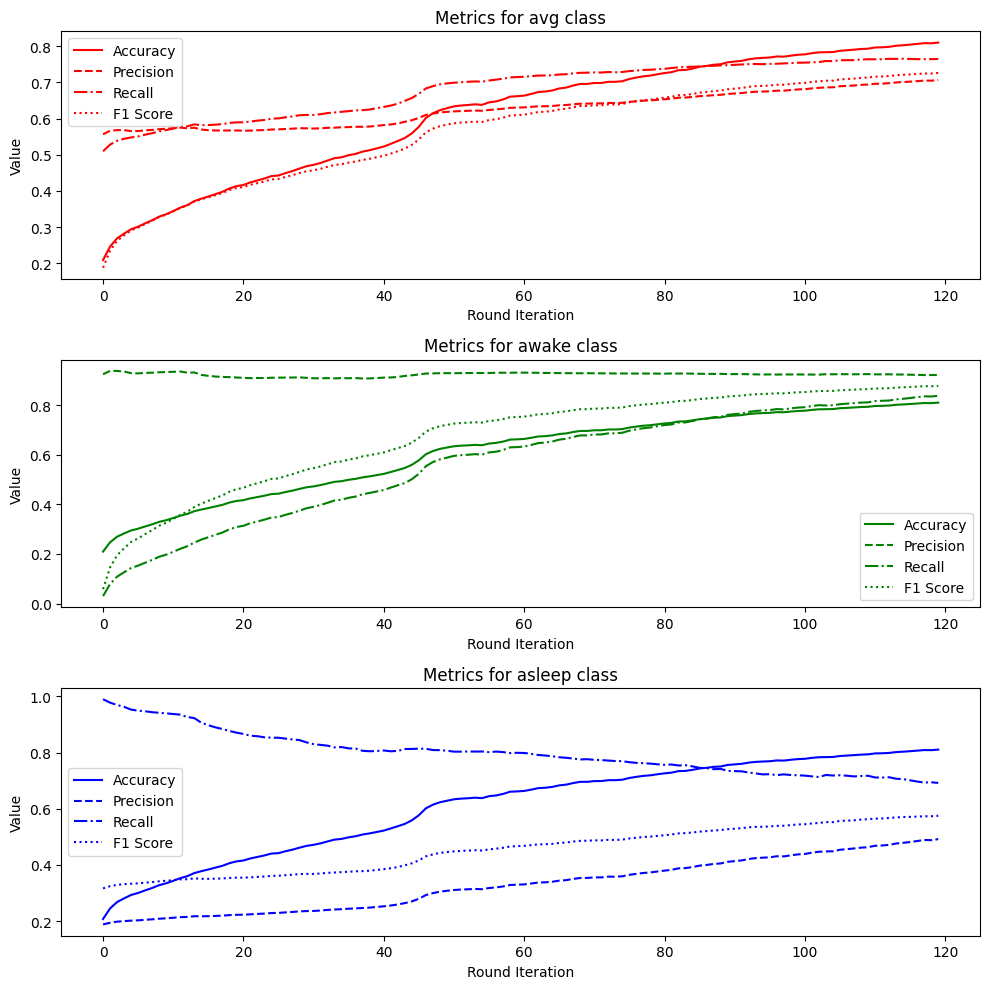

In [11]:
import matplotlib.pyplot as plt

metrics = ["round_iteration", "accuracy", "precision", "recall", "f1_score"]
classes = ["avg", "awake", "asleep"]
colors = ["red", "green", "blue"]

fig, axs = plt.subplots(nrows=3, figsize=(10, 10))

for i, class_name in enumerate(classes):
    df_class = dsMetrics.loc[dsMetrics['class'] == class_name]
    ax = axs[i]
    ax.plot(df_class["round_iteration"], df_class["accuracy"], color=colors[i], label="Accuracy")
    ax.plot(df_class["round_iteration"], df_class["precision"], color=colors[i], linestyle="--", label="Precision")
    ax.plot(df_class["round_iteration"], df_class["recall"], color=colors[i], linestyle="-.", label="Recall")
    ax.plot(df_class["round_iteration"], df_class["f1_score"], color=colors[i], linestyle=":", label="F1 Score")
    ax.set_title(f"Metrics for {class_name} class")
    ax.set_xlabel("Round Iteration")
    ax.set_ylabel("Value")
    ax.legend()

plt.tight_layout()
plt.show()

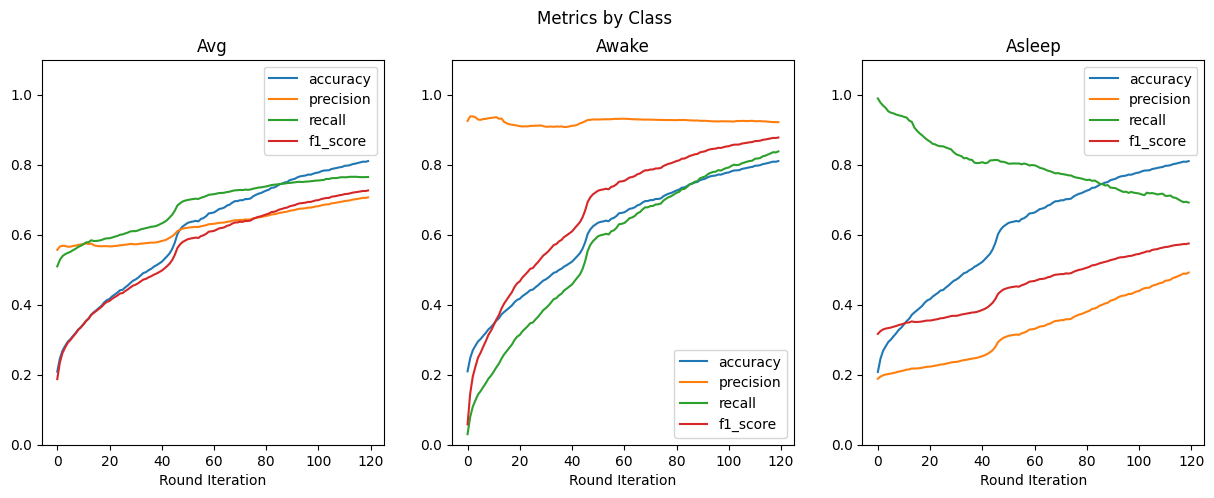

In [12]:
import matplotlib.pyplot as plt

# Define the metrics and classes to plot
metrics = ['round_iteration', 'accuracy', 'precision', 'recall', 'f1_score']
classes = ['avg', 'awake', 'asleep']

# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Loop through the classes and plot each one on a different subplot
for i, class_name in enumerate(classes):
    # Filter the data for the current class
    df_class = dsMetrics.loc[dsMetrics['class'] == class_name]
    
    # Plot the metrics on the current subplot
    df_class[metrics].plot.line(x='round_iteration', ax=axes[i])
    axes[i].set_title(class_name.capitalize())
    axes[i].set_xlabel('Round Iteration')
    axes[i].set_ylim([0, 1.1])
    
# Add a title for the entire plot
plt.suptitle('Metrics by Class')

# Show the plot
plt.show()

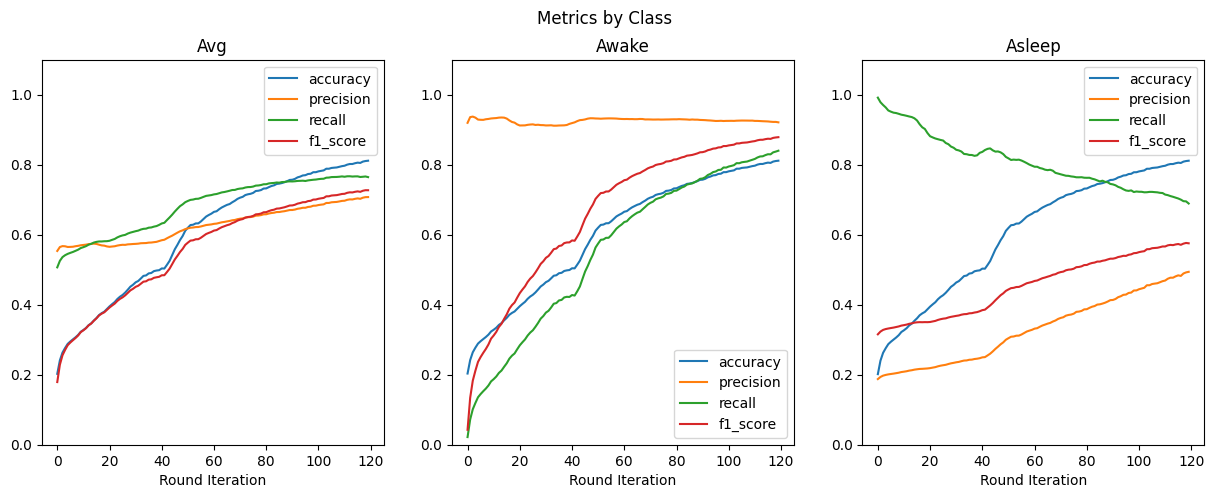

In [13]:
import matplotlib.pyplot as plt

dsMetrics = pd.read_csv("result3epochsLSTM_oversample_smote.csv")


# Define the metrics and classes to plot
metrics = ['round_iteration', 'accuracy', 'precision', 'recall', 'f1_score']
classes = ['avg', 'awake', 'asleep']

# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Loop through the classes and plot each one on a different subplot
for i, class_name in enumerate(classes):
    # Filter the data for the current class
    df_class = dsMetrics.loc[dsMetrics['class'] == class_name]
    
    # Plot the metrics on the current subplot
    df_class[metrics].plot.line(x='round_iteration', ax=axes[i])
    axes[i].set_title(class_name.capitalize())
    axes[i].set_xlabel('Round Iteration')
    axes[i].set_ylim([0, 1.1])
    
# Add a title for the entire plot
plt.suptitle('Metrics by Class')

# Show the plot
plt.show()

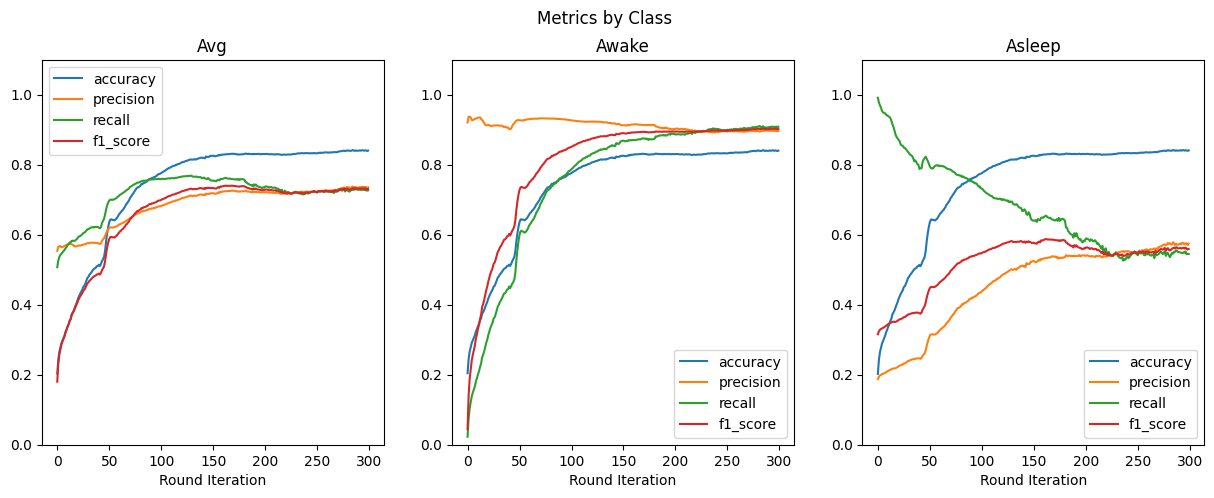

In [14]:
import matplotlib.pyplot as plt

dsMetrics = pd.read_csv("result3epochsLSTM_oversample_smote_300ep.csv")


# Define the metrics and classes to plot
metrics = ['round_iteration', 'accuracy', 'precision', 'recall', 'f1_score']
classes = ['avg', 'awake', 'asleep']

# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Loop through the classes and plot each one on a different subplot
for i, class_name in enumerate(classes):
    # Filter the data for the current class
    df_class = dsMetrics.loc[dsMetrics['class'] == class_name]
    
    # Plot the metrics on the current subplot
    df_class[metrics].plot.line(x='round_iteration', ax=axes[i])
    axes[i].set_title(class_name.capitalize())
    axes[i].set_xlabel('Round Iteration')
    axes[i].set_ylim([0, 1.1])
    
# Add a title for the entire plot
plt.suptitle('Metrics by Class')

# Show the plot
plt.show()

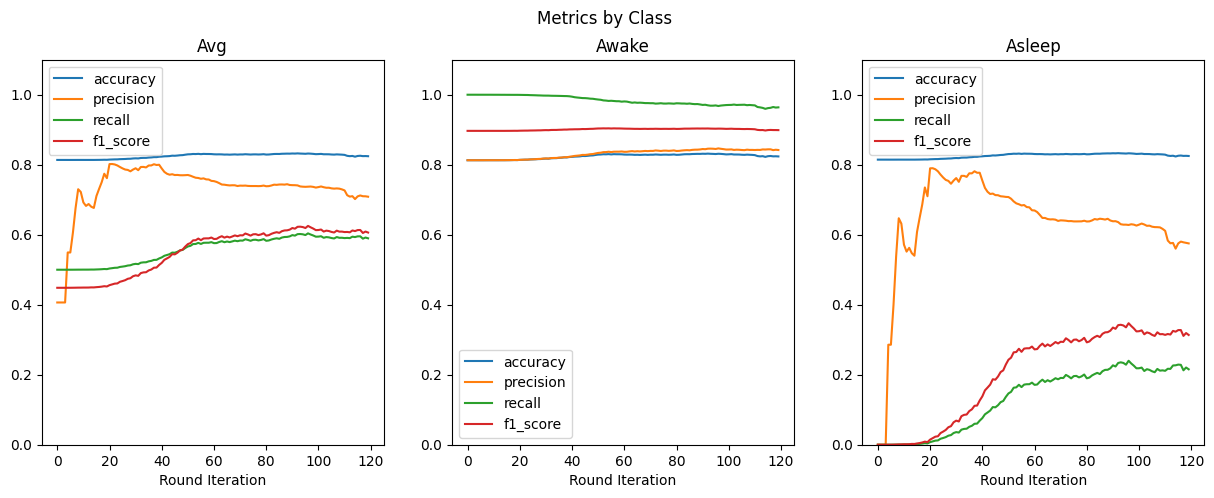

In [15]:
import matplotlib.pyplot as plt

dsMetrics = pd.read_csv("result3epochsLSTM_unb.csv")


# Define the metrics and classes to plot
metrics = ['round_iteration', 'accuracy', 'precision', 'recall', 'f1_score']
classes = ['avg', 'awake', 'asleep']

# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Loop through the classes and plot each one on a different subplot
for i, class_name in enumerate(classes):
    # Filter the data for the current class
    df_class = dsMetrics.loc[dsMetrics['class'] == class_name]
    
    # Plot the metrics on the current subplot
    df_class[metrics].plot.line(x='round_iteration', ax=axes[i])
    axes[i].set_title(class_name.capitalize())
    axes[i].set_xlabel('Round Iteration')
    axes[i].set_ylim([0, 1.1])
    
# Add a title for the entire plot
plt.suptitle('Metrics by Class')

# Show the plot
plt.show()

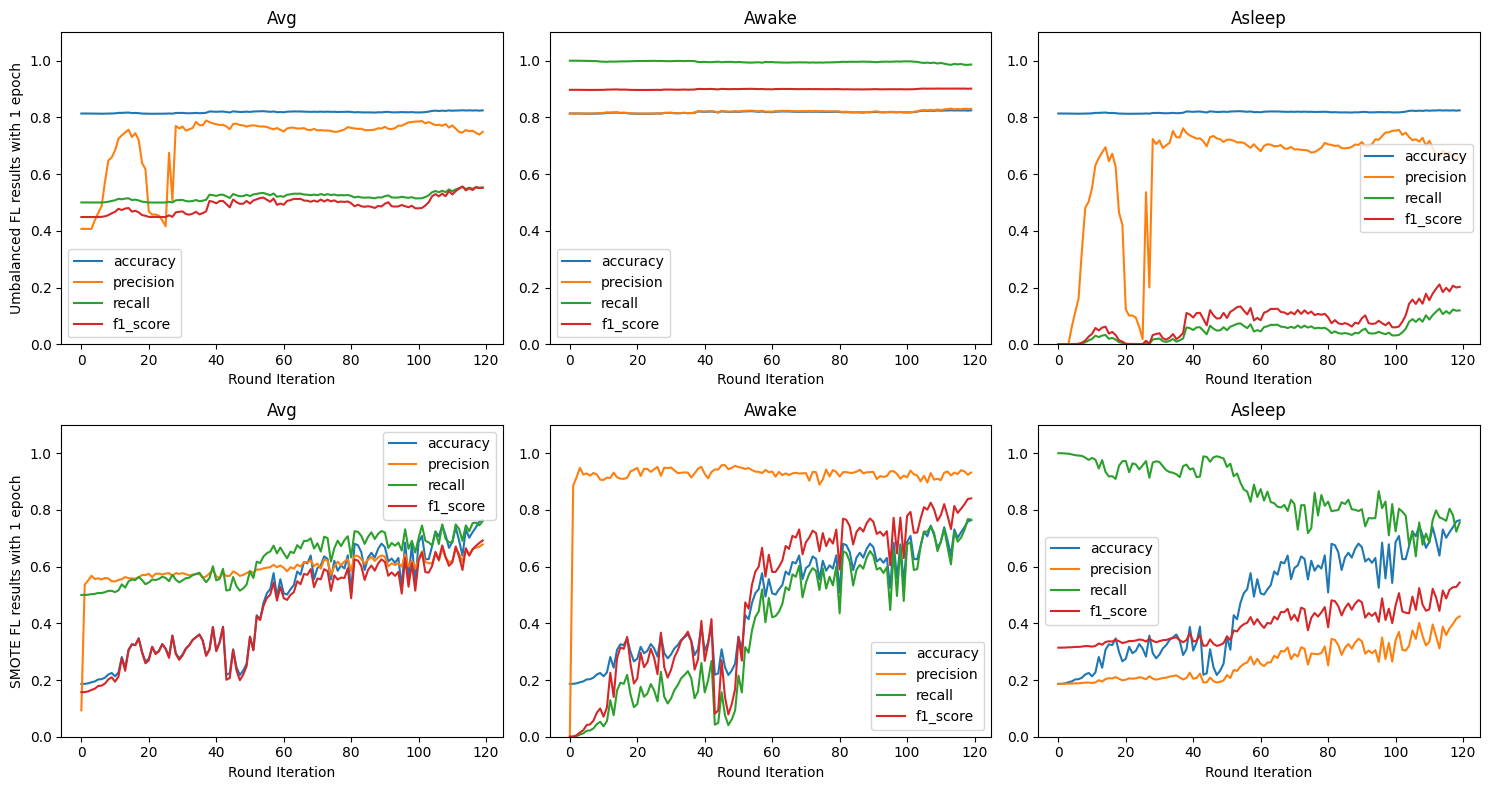

In [14]:
import matplotlib.pyplot as plt

dsMetricsUn = pd.read_csv("result1epochsMLPunbalanced2.csv")
dsMetricsBa = pd.read_csv("result1epochsMLP_oversample_smote.csv")

# subset dataframes for unbalanced and balanced data
unbalanced_data = dsMetricsUn
balanced_data = dsMetricsBa

# define metrics to plot
metrics = ["round_iteration","accuracy","precision","recall","f1_score"]
classes = ['avg', 'awake', 'asleep']

# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

currentRow = 0
# create subplots for unbalanced data
for i, class_name in enumerate(classes):
    # Filter the data for the current class
    df_class = unbalanced_data.loc[unbalanced_data['class'] == class_name]
    
    axsAtual = axes[currentRow, i]
    # Plot the metrics on the current subplot
    df_class[metrics].plot.line(x='round_iteration', ax=axsAtual)
    axsAtual.set_title(class_name.capitalize())
    axsAtual.set_xlabel('Round Iteration')
    axsAtual.set_ylim([0, 1.1])
    if(i == 0):
        axsAtual.set_ylabel("Umbalanced FL results with 1 epoch")

currentRow = 1
# create subplots for balanced data with SMOTE
for i, class_name in enumerate(classes):
    # Filter the data for the current class
    df_class = balanced_data.loc[balanced_data['class'] == class_name]
    
    axsAtual = axes[currentRow, i]
    # Plot the metrics on the current subplot
    df_class[metrics].plot.line(x='round_iteration', ax=axsAtual)
    axsAtual.set_title(class_name.capitalize())
    axsAtual.set_xlabel('Round Iteration')
    axsAtual.set_ylim([0, 1.1])
    if(i == 0):
        axsAtual.set_ylabel("SMOTE FL results with 1 epoch")


# adjust layout and show the plot
fig.tight_layout()
# Add a title for the entire plot
#plt.suptitle('Metrics by Class')

# Show the plot
plt.show()

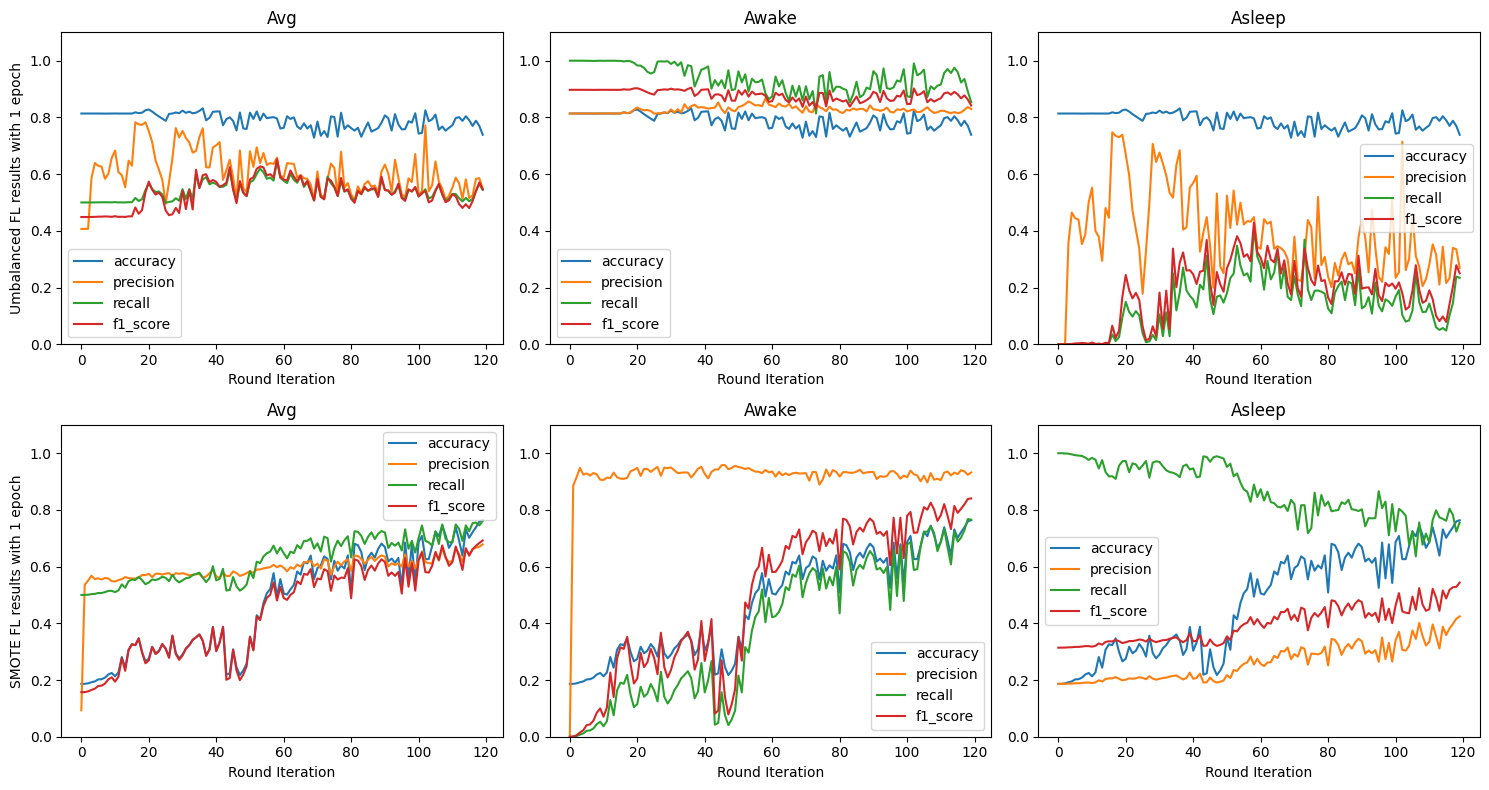

In [15]:
import matplotlib.pyplot as plt

dsMetricsUn = pd.read_csv("result1epochsMLPunbalanced.csv")
dsMetricsBa = pd.read_csv("result1epochsMLP_oversample_smote.csv")

# subset dataframes for unbalanced and balanced data
unbalanced_data = dsMetricsUn
balanced_data = dsMetricsBa

# define metrics to plot
metrics = ["round_iteration","accuracy","precision","recall","f1_score"]
classes = ['avg', 'awake', 'asleep']

# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

currentRow = 0
# create subplots for unbalanced data
for i, class_name in enumerate(classes):
    # Filter the data for the current class
    df_class = unbalanced_data.loc[unbalanced_data['class'] == class_name]
    
    axsAtual = axes[currentRow, i]
    # Plot the metrics on the current subplot
    df_class[metrics].plot.line(x='round_iteration', ax=axsAtual)
    axsAtual.set_title(class_name.capitalize())
    axsAtual.set_xlabel('Round Iteration')
    axsAtual.set_ylim([0, 1.1])
    if(i == 0):
        axsAtual.set_ylabel("Umbalanced FL results with 1 epoch")

currentRow = 1
# create subplots for balanced data with SMOTE
for i, class_name in enumerate(classes):
    # Filter the data for the current class
    df_class = balanced_data.loc[balanced_data['class'] == class_name]
    
    axsAtual = axes[currentRow, i]
    # Plot the metrics on the current subplot
    df_class[metrics].plot.line(x='round_iteration', ax=axsAtual)
    axsAtual.set_title(class_name.capitalize())
    axsAtual.set_xlabel('Round Iteration')
    axsAtual.set_ylim([0, 1.1])
    if(i == 0):
        axsAtual.set_ylabel("SMOTE FL results with 1 epoch")


# adjust layout and show the plot
fig.tight_layout()
# Add a title for the entire plot
#plt.suptitle('Metrics by Class')

# Show the plot
plt.show()

Testes usando 3 épocas em MLP


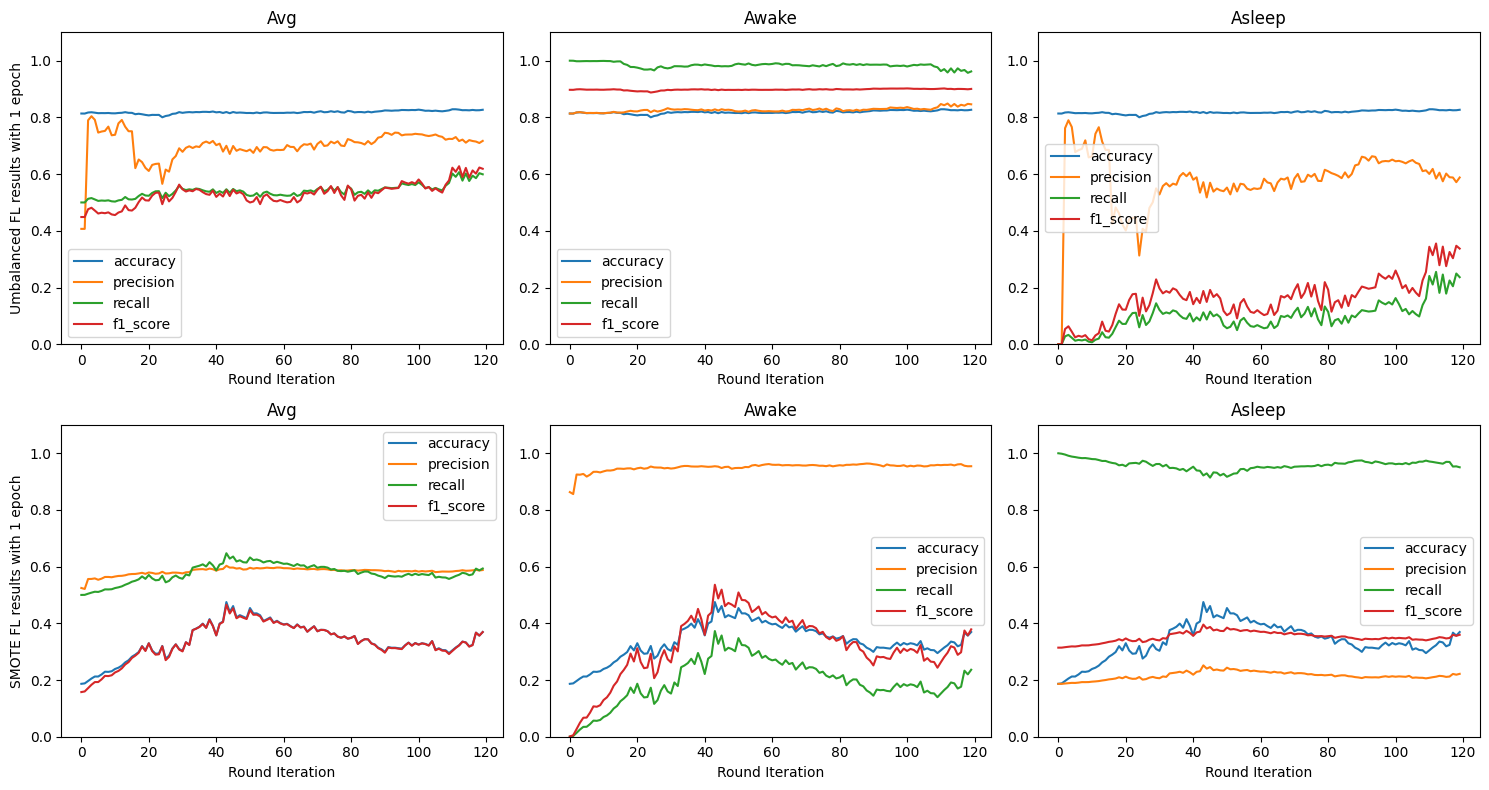

In [17]:
import matplotlib.pyplot as plt

dsMetricsUn = pd.read_csv("result3epochsMLPunbalanced.csv")
dsMetricsBa = pd.read_csv("result3epochsMLP_oversample_smote.csv")

# subset dataframes for unbalanced and balanced data
unbalanced_data = dsMetricsUn
balanced_data = dsMetricsBa

# define metrics to plot
metrics = ["round_iteration","accuracy","precision","recall","f1_score"]
classes = ['avg', 'awake', 'asleep']

# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

currentRow = 0
# create subplots for unbalanced data
for i, class_name in enumerate(classes):
    # Filter the data for the current class
    df_class = unbalanced_data.loc[unbalanced_data['class'] == class_name]
    
    axsAtual = axes[currentRow, i]
    # Plot the metrics on the current subplot
    df_class[metrics].plot.line(x='round_iteration', ax=axsAtual)
    axsAtual.set_title(class_name.capitalize())
    axsAtual.set_xlabel('Round Iteration')
    axsAtual.set_ylim([0, 1.1])
    if(i == 0):
        axsAtual.set_ylabel("Umbalanced FL results with 3 epoch")

currentRow = 1
# create subplots for balanced data with SMOTE
for i, class_name in enumerate(classes):
    # Filter the data for the current class
    df_class = balanced_data.loc[balanced_data['class'] == class_name]
    
    axsAtual = axes[currentRow, i]
    # Plot the metrics on the current subplot
    df_class[metrics].plot.line(x='round_iteration', ax=axsAtual)
    axsAtual.set_title(class_name.capitalize())
    axsAtual.set_xlabel('Round Iteration')
    axsAtual.set_ylim([0, 1.1])
    if(i == 0):
        axsAtual.set_ylabel("SMOTE FL results with 3 epoch")


# adjust layout and show the plot
fig.tight_layout()
# Add a title for the entire plot
#plt.suptitle('Metrics by Class')
print("Testes usando 3 épocas em MLP")
# Show the plot
plt.show()

LSTM com 3 épocas


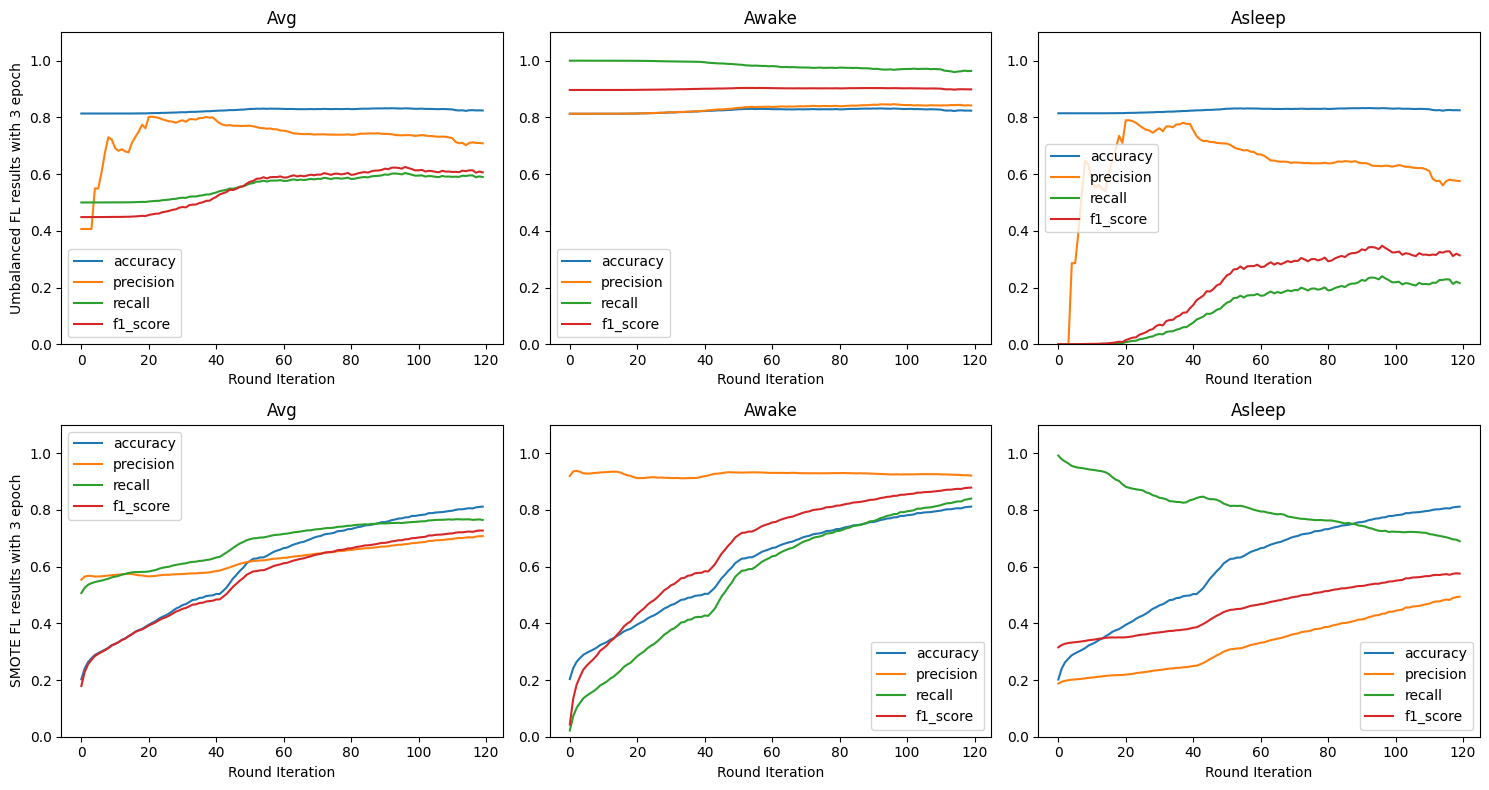

In [18]:
import matplotlib.pyplot as plt

dsMetricsUn = pd.read_csv("result3epochsLSTM_unb.csv")
dsMetricsBa = pd.read_csv("result3epochsLSTM_oversample_smote.csv")

# subset dataframes for unbalanced and balanced data
unbalanced_data = dsMetricsUn
balanced_data = dsMetricsBa

# define metrics to plot
metrics = ["round_iteration","accuracy","precision","recall","f1_score"]
classes = ['avg', 'awake', 'asleep']

# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

currentRow = 0
# create subplots for unbalanced data
for i, class_name in enumerate(classes):
    # Filter the data for the current class
    df_class = unbalanced_data.loc[unbalanced_data['class'] == class_name]
    
    axsAtual = axes[currentRow, i]
    # Plot the metrics on the current subplot
    df_class[metrics].plot.line(x='round_iteration', ax=axsAtual)
    axsAtual.set_title(class_name.capitalize())
    axsAtual.set_xlabel('Round Iteration')
    axsAtual.set_ylim([0, 1.1])
    if(i == 0):
        axsAtual.set_ylabel("Umbalanced FL results with 3 epoch")

currentRow = 1
# create subplots for balanced data with SMOTE
for i, class_name in enumerate(classes):
    # Filter the data for the current class
    df_class = balanced_data.loc[balanced_data['class'] == class_name]
    
    axsAtual = axes[currentRow, i]
    # Plot the metrics on the current subplot
    df_class[metrics].plot.line(x='round_iteration', ax=axsAtual)
    axsAtual.set_title(class_name.capitalize())
    axsAtual.set_xlabel('Round Iteration')
    axsAtual.set_ylim([0, 1.1])
    if(i == 0):
        axsAtual.set_ylabel("SMOTE FL results with 3 epoch")


# adjust layout and show the plot
fig.tight_layout()
# Add a title for the entire plot
#plt.suptitle('Metrics by Class')
print("LSTM com 3 épocas")
# Show the plot
plt.show()

LSTM com 3 épocas


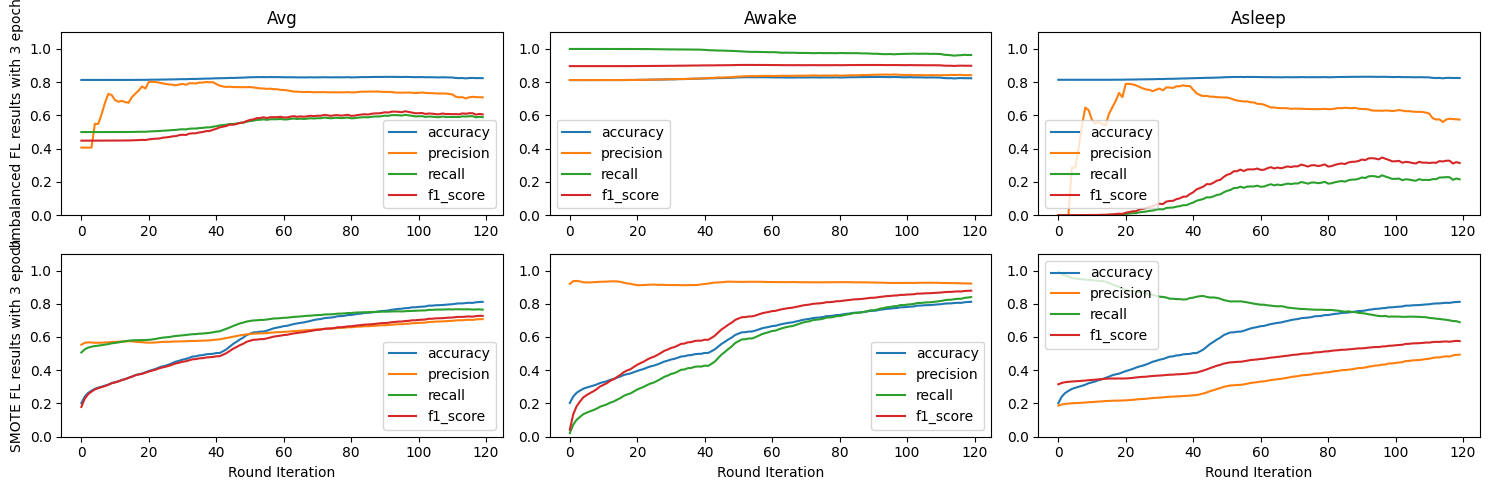

In [22]:
import matplotlib.pyplot as plt

dsMetricsUn = pd.read_csv("result3epochsLSTM_unb.csv")
dsMetricsBa = pd.read_csv("result3epochsLSTM_oversample_smote.csv")

# subset dataframes for unbalanced and balanced data
unbalanced_data = dsMetricsUn
balanced_data = dsMetricsBa

# define metrics to plot
metrics = ["round_iteration","accuracy","precision","recall","f1_score"]
classes = ['avg', 'awake', 'asleep']

# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 5))

currentRow = 0
# create subplots for unbalanced data
for i, class_name in enumerate(classes):
    # Filter the data for the current class
    df_class = unbalanced_data.loc[unbalanced_data['class'] == class_name]
    
    axsAtual = axes[currentRow, i]
    # Plot the metrics on the current subplot
    df_class[metrics].plot.line(x='round_iteration', ax=axsAtual)
    axsAtual.set_title(class_name.capitalize())
    axsAtual.set_xlabel('Round Iteration')
    axsAtual.set_xlabel('')
    axsAtual.set_ylim([0, 1.1])
    if(i == 0):
        axsAtual.set_ylabel("Umbalanced FL results with 3 epoch")

currentRow = 1
# create subplots for balanced data with SMOTE
for i, class_name in enumerate(classes):
    # Filter the data for the current class
    df_class = balanced_data.loc[balanced_data['class'] == class_name]
    
    axsAtual = axes[currentRow, i]
    # Plot the metrics on the current subplot
    df_class[metrics].plot.line(x='round_iteration', ax=axsAtual)
    #axsAtual.set_title(class_name.capitalize())
    axsAtual.set_xlabel('Round Iteration')
    axsAtual.set_ylim([0, 1.1])
    if(i == 0):
        axsAtual.set_ylabel("SMOTE FL results with 3 epoch")


# adjust layout and show the plot
fig.tight_layout()
# Add a title for the entire plot
#plt.suptitle('Metrics by Class')
print("LSTM com 3 épocas")
# Show the plot
plt.show()

LSTM com 3 épocas


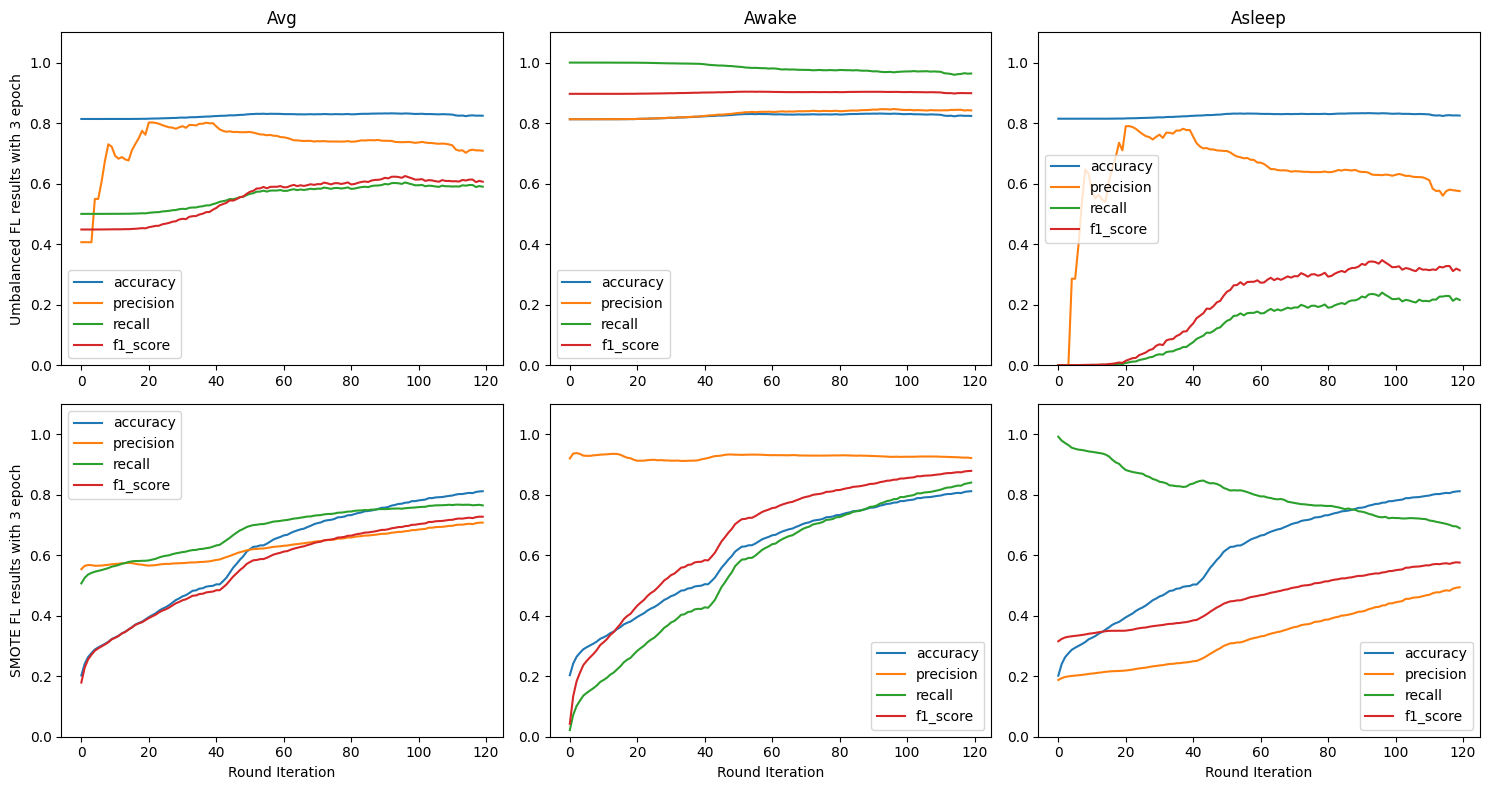

In [23]:
import matplotlib.pyplot as plt

dsMetricsUn = pd.read_csv("result3epochsLSTM_unb.csv")
dsMetricsBa = pd.read_csv("result3epochsLSTM_oversample_smote.csv")

# subset dataframes for unbalanced and balanced data
unbalanced_data = dsMetricsUn
balanced_data = dsMetricsBa

# define metrics to plot
metrics = ["round_iteration","accuracy","precision","recall","f1_score"]
classes = ['avg', 'awake', 'asleep']

# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

currentRow = 0
# create subplots for unbalanced data
for i, class_name in enumerate(classes):
    # Filter the data for the current class
    df_class = unbalanced_data.loc[unbalanced_data['class'] == class_name]
    
    axsAtual = axes[currentRow, i]
    # Plot the metrics on the current subplot
    df_class[metrics].plot.line(x='round_iteration', ax=axsAtual)
    axsAtual.set_title(class_name.capitalize())
    axsAtual.set_xlabel('Round Iteration')
    axsAtual.set_xlabel('')
    axsAtual.set_ylim([0, 1.1])
    if(i == 0):
        axsAtual.set_ylabel("Umbalanced FL results with 3 epoch")

currentRow = 1
# create subplots for balanced data with SMOTE
for i, class_name in enumerate(classes):
    # Filter the data for the current class
    df_class = balanced_data.loc[balanced_data['class'] == class_name]
    
    axsAtual = axes[currentRow, i]
    # Plot the metrics on the current subplot
    df_class[metrics].plot.line(x='round_iteration', ax=axsAtual)
    #axsAtual.set_title(class_name.capitalize())
    axsAtual.set_xlabel('Round Iteration')
    axsAtual.set_ylim([0, 1.1])
    if(i == 0):
        axsAtual.set_ylabel("SMOTE FL results with 3 epoch")


# adjust layout and show the plot
fig.tight_layout()
# Add a title for the entire plot
#plt.suptitle('Metrics by Class')
print("LSTM com 3 épocas")
# Show the plot
plt.show()

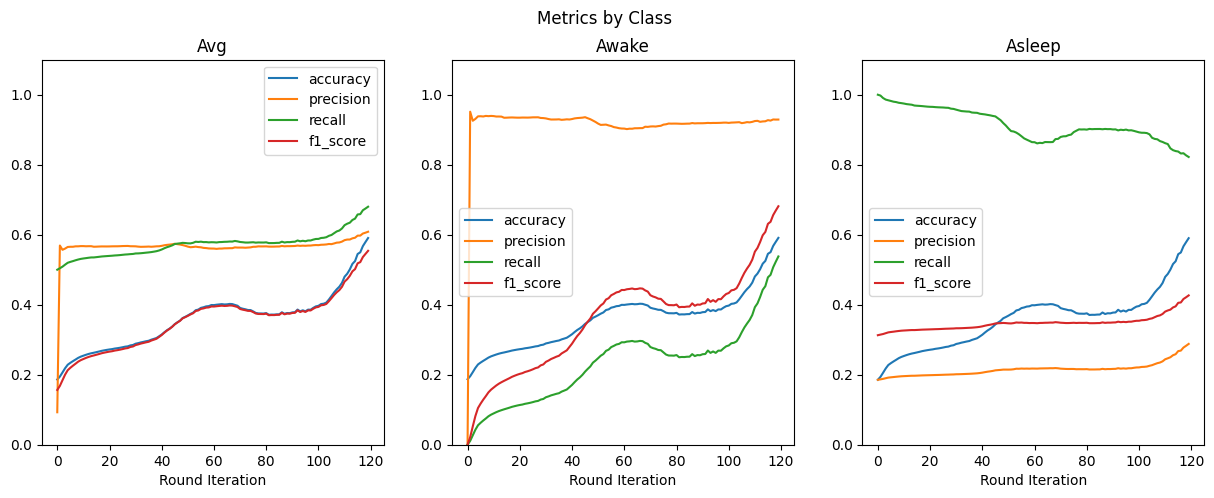

In [19]:
import matplotlib.pyplot as plt

dsMetrics = pd.read_csv("result1epochsLSTM_oversample_smote.csv")


# Define the metrics and classes to plot
metrics = ['round_iteration', 'accuracy', 'precision', 'recall', 'f1_score']
classes = ['avg', 'awake', 'asleep']

# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Loop through the classes and plot each one on a different subplot
for i, class_name in enumerate(classes):
    # Filter the data for the current class
    df_class = dsMetrics.loc[dsMetrics['class'] == class_name]
    
    # Plot the metrics on the current subplot
    df_class[metrics].plot.line(x='round_iteration', ax=axes[i])
    axes[i].set_title(class_name.capitalize())
    axes[i].set_xlabel('Round Iteration')
    axes[i].set_ylim([0, 1.1])
    
# Add a title for the entire plot
plt.suptitle('Metrics by Class')

# Show the plot
plt.show()

LSTM com 3 épocas


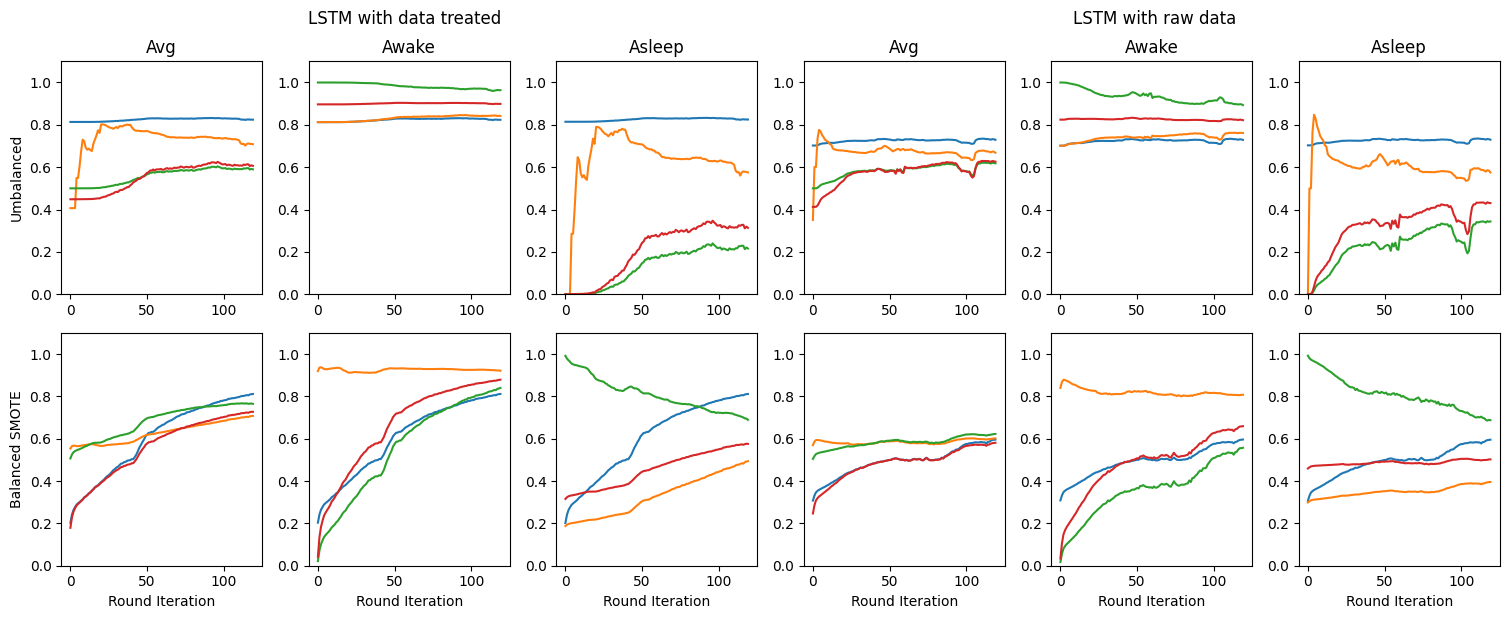

In [84]:
import matplotlib.pyplot as plt

dsMetricsUn = pd.read_csv("result3epochsLSTM_unb.csv")
dsMetricsBa = pd.read_csv("result3epochsLSTM_oversample_smote.csv")

# subset dataframes for unbalanced and balanced data
unbalanced_data = dsMetricsUn
balanced_data = dsMetricsBa

# define metrics to plot
metrics = ["round_iteration","accuracy","precision","recall","f1_score"]
classes = ['avg', 'awake', 'asleep']

# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(15, 6))

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'color': 'black',
        'size': 16,
        }

currentRow = 0
# create subplots for unbalanced data
for i, class_name in enumerate(classes):
    # Filter the data for the current class
    df_class = unbalanced_data.loc[unbalanced_data['class'] == class_name]
    
    axsAtual = axes[currentRow, i]
    # Plot the metrics on the current subplot
    df_class[metrics].plot.line(x='round_iteration', ax=axsAtual)
    axsAtual.set_title(class_name.capitalize())
    axsAtual.set_xlabel('Round Iteration')
    axsAtual.set_xlabel('')
    axsAtual.set_ylim([0, 1.1])
    axsAtual.get_legend().remove()

currentRow = 1
# create subplots for balanced data with SMOTE
for i, class_name in enumerate(classes):
    # Filter the data for the current class
    df_class = balanced_data.loc[balanced_data['class'] == class_name]
    
    axsAtual = axes[currentRow, i]
    # Plot the metrics on the current subplot
    df_class[metrics].plot.line(x='round_iteration', ax=axsAtual)
    #axsAtual.set_title(class_name.capitalize())
    axsAtual.set_xlabel('Round Iteration')
    axsAtual.set_ylim([0, 1.1])
    axsAtual.get_legend().remove()


dsMetricsUn = pd.read_csv("../../00_definitive_tests_with_raw_user_data_fix_inverted_time/02_data_analysis/result3epochsLSTM.csv")
dsMetricsBa = pd.read_csv("../../00_definitive_tests_with_raw_user_data_fix_inverted_time/02_data_analysis/result3epochsLSTM_oversample_smote.csv")

# subset dataframes for unbalanced and balanced data
unbalanced_data = dsMetricsUn
balanced_data = dsMetricsBa

currentRow = 0
# create subplots for unbalanced data
for i, class_name in enumerate(classes):
    # Filter the data for the current class
    df_class = unbalanced_data.loc[unbalanced_data['class'] == class_name]
    
    axsAtual = axes[currentRow, (i+3)]
    # Plot the metrics on the current subplot
    df_class[metrics].plot.line(x='round_iteration', ax=axsAtual)
    axsAtual.set_title(class_name.capitalize())
    axsAtual.set_xlabel('Round Iteration')
    axsAtual.set_xlabel('')
    axsAtual.set_ylim([0, 1.1])
    axsAtual.get_legend().remove()
    
    #if(i == 1): 
    #    axsAtual.text(0, 1.25, "LSTM with raw data",  fontdict=font)

currentRow = 1
# create subplots for balanced data with SMOTE
for i, class_name in enumerate(classes):
    # Filter the data for the current class
    df_class = balanced_data.loc[balanced_data['class'] == class_name]
    
    axsAtual = axes[currentRow, (i+3)]
    # Plot the metrics on the current subplot
    df_class[metrics].plot.line(x='round_iteration', ax=axsAtual)
    #axsAtual.set_title(class_name.capitalize())
    axsAtual.set_xlabel('Round Iteration')
    axsAtual.set_ylim([0, 1.1])
    axsAtual.get_legend().remove()

    
# adjust layout and show the plot
fig.tight_layout()

# legends used to  
fig.text(0.26, 1.00, "LSTM with data treated", ha="center", fontsize=12)
fig.text(0.76, 1.00, "LSTM with raw data", ha="center", fontsize=12)

axes[0,0].set_ylabel("Umbalanced")
axes[1,0].set_ylabel("Balanced SMOTE")
#fig.text(14.5, 1.25, "LSTM with data treated",  fontdict=font)
# Add a title for the entire plot
#plt.suptitle('Metrics by Class')
print("LSTM com 3 épocas")
# Show the plot
plt.show()

LSTM com 3 épocas


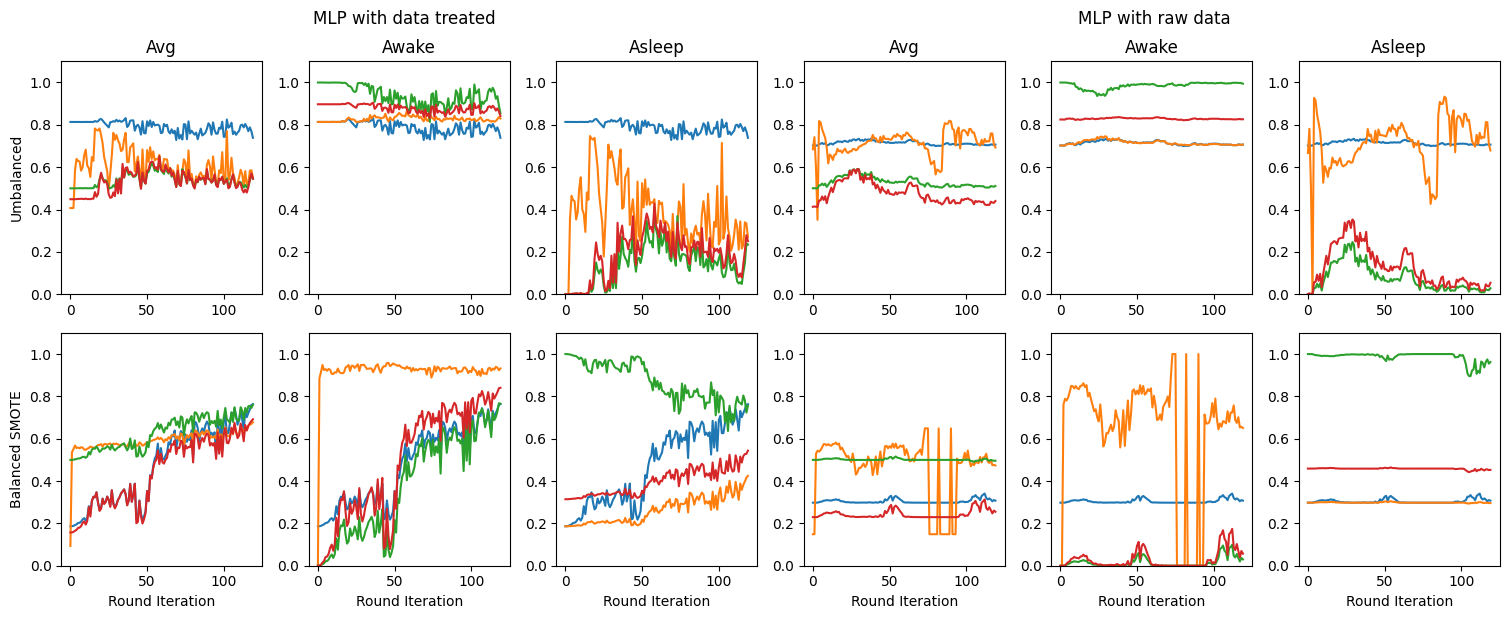

In [121]:
import matplotlib.pyplot as plt

dsMetricsUn = pd.read_csv("result1epochsMLPunbalanced.csv")
dsMetricsBa = pd.read_csv("result1epochsMLP_oversample_smote.csv")

# subset dataframes for unbalanced and balanced data
unbalanced_data = dsMetricsUn
balanced_data = dsMetricsBa

# define metrics to plot
metrics = ["round_iteration","accuracy","precision","recall","f1_score"]
classes = ['avg', 'awake', 'asleep']

# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(15, 6))

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'color': 'black',
        'size': 16,
        }

currentRow = 0
# create subplots for unbalanced data
for i, class_name in enumerate(classes):
    # Filter the data for the current class
    df_class = unbalanced_data.loc[unbalanced_data['class'] == class_name]
    
    axsAtual = axes[currentRow, i]
    # Plot the metrics on the current subplot
    df_class[metrics].plot.line(x='round_iteration', ax=axsAtual)
    axsAtual.set_title(class_name.capitalize())
    axsAtual.set_xlabel('Round Iteration')
    axsAtual.set_xlabel('')
    axsAtual.set_ylim([0, 1.1])
    axsAtual.get_legend().remove()

currentRow = 1
# create subplots for balanced data with SMOTE
for i, class_name in enumerate(classes):
    # Filter the data for the current class
    df_class = balanced_data.loc[balanced_data['class'] == class_name]
    
    axsAtual = axes[currentRow, i]
    # Plot the metrics on the current subplot
    df_class[metrics].plot.line(x='round_iteration', ax=axsAtual)
    #axsAtual.set_title(class_name.capitalize())
    axsAtual.set_xlabel('Round Iteration')
    axsAtual.set_ylim([0, 1.1])
    axsAtual.get_legend().remove()


dsMetricsUn = pd.read_csv("../../00_definitive_tests_with_raw_user_data_fix_inverted_time/02_data_analysis/result3epochsMLPunbalanced.csv")
dsMetricsBa = pd.read_csv("../../00_definitive_tests_with_raw_user_data_fix_inverted_time/02_data_analysis/result1epochsMLP_oversample_smote.csv")

# subset dataframes for unbalanced and balanced data
unbalanced_data = dsMetricsUn
balanced_data = dsMetricsBa

currentRow = 0
# create subplots for unbalanced data
for i, class_name in enumerate(classes):
    # Filter the data for the current class
    df_class = unbalanced_data.loc[unbalanced_data['class'] == class_name]
    
    axsAtual = axes[currentRow, (i+3)]
    # Plot the metrics on the current subplot
    df_class[metrics].plot.line(x='round_iteration', ax=axsAtual)
    axsAtual.set_title(class_name.capitalize())
    axsAtual.set_xlabel('Round Iteration')
    axsAtual.set_xlabel('')
    axsAtual.set_ylim([0, 1.1])
    axsAtual.get_legend().remove()
    
    #if(i == 1): 
    #    axsAtual.text(0, 1.25, "LSTM with raw data",  fontdict=font)

currentRow = 1
# create subplots for balanced data with SMOTE
for i, class_name in enumerate(classes):
    # Filter the data for the current class
    df_class = balanced_data.loc[balanced_data['class'] == class_name]
    
    axsAtual = axes[currentRow, (i+3)]
    # Plot the metrics on the current subplot
    df_class[metrics].plot.line(x='round_iteration', ax=axsAtual)
    #axsAtual.set_title(class_name.capitalize())
    axsAtual.set_xlabel('Round Iteration')
    axsAtual.set_ylim([0, 1.1])
    axsAtual.get_legend().remove()

    
# adjust layout and show the plot
fig.tight_layout()

# legends used to  
fig.text(0.26, 1.00, "MLP with data treated", ha="center", fontsize=12)
fig.text(0.76, 1.00, "MLP with raw data", ha="center", fontsize=12)

axes[0,0].set_ylabel("Umbalanced")
axes[1,0].set_ylabel("Balanced SMOTE")
#fig.text(14.5, 1.25, "LSTM with data treated",  fontdict=font)
# Add a title for the entire plot
#plt.suptitle('Metrics by Class')
print("LSTM com 3 épocas")
# Show the plot
plt.show()